# K-means clustering

In this section you will create clusters based on book ratings using K-means operations. 

Are there similarities between books when we plot them in a graph? Are there possible clusters we can derive from this spatial layout? 

To help us cluster our book data, we will be using the sklearn Kmeans and a graph layout function from Ch.7 in our manual. 

## 1. Load the dataset

In [1]:
import pandas as pd
df_books_ratings = pd.read_csv('data/BX-Book-Ratings-Subset.csv', sep=';')
df_books_ratings

,User-ID,ISBN,Book-Rating
0,277203,039480001X,9
1,277427,002542730X,10
2,277427,0061009059,9
3,277427,0316776963,8
4,277427,0345413903,10
...,...,...,...
29982,276680,0375727132,8
29983,276680,0375727345,8
29984,276680,0385504209,8
29985,276680,0440221595,8


## 1. Construct a ratings matrix 

To cluster our data we need to construct a matrix where each row is the ratings from all users for a certain book. In other words, the index of the matrix will be books ISBN and the columns user ratings (i.e., one column per User-ID).

Can you construct such (huge!) matrix with the dataset? (Hint: use the pandas dataframe `pivot` function)

In [2]:
df = df_books_ratings.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)
df

User-ID,242,254,507,638,643,709,805,882,929,1025,...,278026,278137,278188,278202,278221,278356,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006000438X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1576737330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.  Construct a sparse matrix using scipy.sparse

Now that you have a matrix built from the dataset we need to tranform it into a `scipy.sparse` `csr_matrix` in order to produce our clusters with `sklearn.cluster`

In [3]:
from scipy.sparse import csr_matrix

matrix = csr_matrix(df.values)

matrix

<831x3146 sparse matrix of type '<class 'numpy.float64'>'
	with 29987 stored elements in Compressed Sparse Row format>

## 3. Cluster!

Now that you have your matrix ready it is time to cluster! 

Can you fit your matrix into the 3x clusters Kmeans object?  

In [4]:
from sklearn.cluster import KMeans

kmeans_3_clusters = KMeans(n_clusters=3)

clusters = kmeans_3_clusters.fit(matrix)

clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,

What does the  `clusters ` variable hold in terms of data?

## 4. Visualise clusters

Below is a (modified) `plot` function from our manual discussed in Ch.7. section 7.4.2. It displays clusters in a graph. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

Let's use this function to see how our books data can be clustered.  

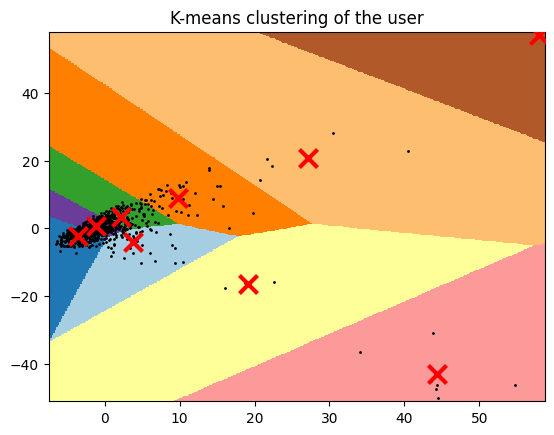

In [8]:
from scipy.sparse import dok_matrix

d_matrix = dok_matrix(matrix).todense()

plot(user_ratings=np.array(d_matrix), k=9)


## 5. How about users?

Can we you use the code above to cluster users depending on their ratings? Can you visualise this clustering using the `plot` function above?

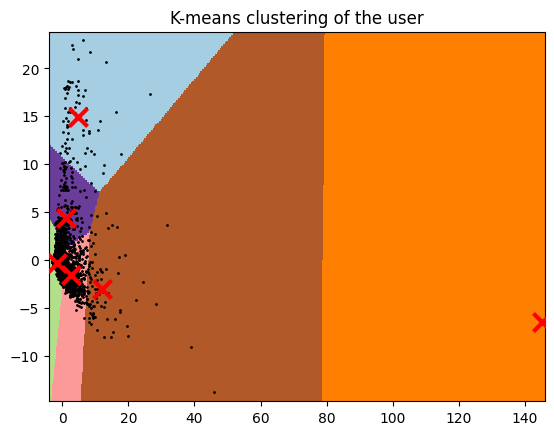

In [9]:
df_users = df_books_ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
df_users

matrix_user = csr_matrix(df_users.values)

d_matrix_user = dok_matrix(matrix_user).todense()

plot(user_ratings=np.array(d_matrix_user), k=6)

## 6. Saving clusters

Create a dataframe consisting of 'User-ID' and cluster labels and save it in the data directory. To help you do this you can use the following code.

In [11]:
# saving clusters

kmeans_6_clusters = KMeans(n_clusters=6)

clusters_users = kmeans_6_clusters.fit(matrix_user)

# print(clusters_users.labels_)

df_to_save = pd.DataFrame()
df_to_save['User-ID'] = df_users.index
df_to_save['Cluster'] = clusters_users.labels_

df_to_save.to_csv('data/BX-users-cluster-6.csv', index=False, sep=';')